# Q2 Regression
The data contains 300 rows and 3 columns (from the left, A, B, and C). Please build a good regression model which explains column C by a function of  A and B. 

Note: Please do not use any ML libraries or packages. You can simply attach plot of data points and your regression model that fits the data points and of course, code point (preferably Github).

In [112]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math
import seaborn
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 


In [113]:
data= pd.read_excel('Adops & Data Scientist Sample Data copy.xlsx',sheet_name='Q2 Regression',header=0)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
a    300 non-null float64
b    300 non-null float64
c    300 non-null float64
dtypes: float64(3)
memory usage: 7.2 KB


,a,b,c
0,0.490142,-0.179654,11.536508
1,-1.414793,-1.225605,11.828531
2,0.943066,4.506148,-3.235349
3,3.569090,5.068347,-23.891922
4,-1.702460,6.905051,-22.125437


# Data distribution

In [114]:
data.describe()

,a,b,c
count,300.000000,300.000000,300.000000
mean,2.316688,2.012932,-41.567544
std,5.694549,2.998603,581.196205
min,-8.859235,-2.891623,-9999.000000
25%,-1.937274,-0.605841,-23.354257
50%,0.468780,1.935227,-3.087428
75%,7.041309,4.698202,16.303241
max,20.558194,6.997177,202.022916


Text(0, 0.5, 'c')

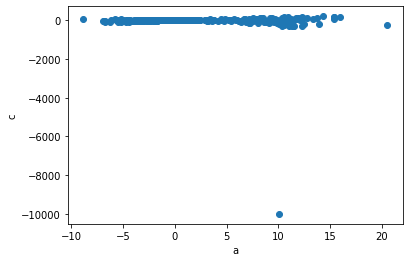

In [115]:
x = data['a']
y = data['c']

plt.scatter(x, y)
plt.xlabel('a')
plt.ylabel('c')
# outlier points:10.07	-2.24	-9999.00

Text(0, 0.5, 'c')

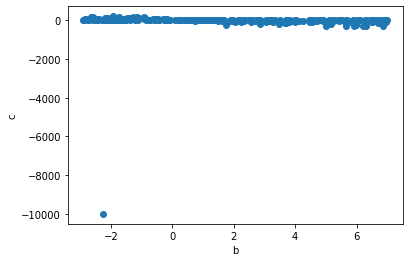

In [116]:
x = data['b']
y = data['c']

plt.scatter(x, y)
plt.xlabel('b')
plt.ylabel('c')
# outlier points:10.07	-2.24	-9999.00

Text(0, 0.5, 'b')

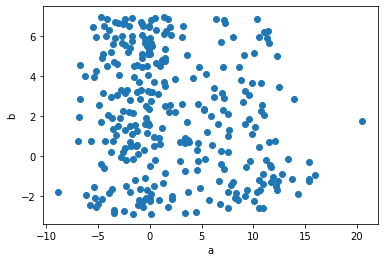

In [117]:
x = data['a']
y = data['b']

plt.scatter(x, y)
plt.xlabel('a')
plt.ylabel('b')
#weird points:20.56	1.74	-248.19
#weird points:-8.86	-1.82	55.04
# outlier points:10.07	-2.24	-9999.00

# Exclude outliers

#weird points:20.56	1.74	-248.19
#weird points:-8.86	-1.82	55.04
#outlier points:10.07	-2.24	-9999.00

In [118]:
# after exclude three points
data= pd.read_excel('Adops & Data Scientist Sample Data copy.xlsx',sheet_name='Sheet1',header=0)
data.describe()


,a,b,c
count,297.000000,297.000000,297.000000
mean,2.266781,2.041098,-7.670408
std,5.568183,2.995130,70.115070
min,-6.962707,-2.891623,-315.397489
25%,-1.927637,-0.575295,-22.958399
50%,0.447417,1.984422,-2.939506
75%,7.014641,4.723184,16.291541
max,15.943976,6.997177,202.022916


# Test linear relationship between A&C B&C

(-0.6303964657075869, 2.625337029115569e-34)

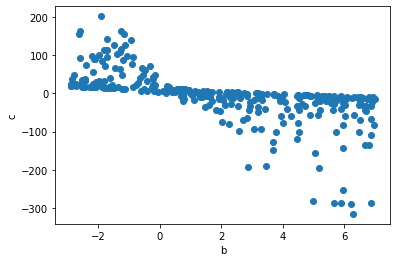

In [119]:
#strong negative linear relation
x = data['b']
y = data['c']

plt.scatter(x, y)
plt.xlabel('b')
plt.ylabel('c')

from scipy import stats
stats.pearsonr(x, y) 
# (correlation,p value)

(0.0547870896820508, 0.34675152954800437)

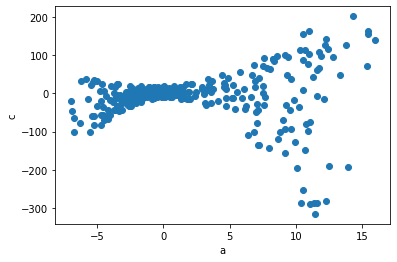

In [120]:
# weak linear relation
x=(data['a'])
y = data['c']

plt.scatter(x, y)
plt.xlabel('a')
plt.ylabel('c')
stats.pearsonr(x, y)

# Regression model: C =  -4.16 * abs(A) * B +1.34 * B + 17.63

(-0.9608092716401371, 2.0542745002720812e-166)

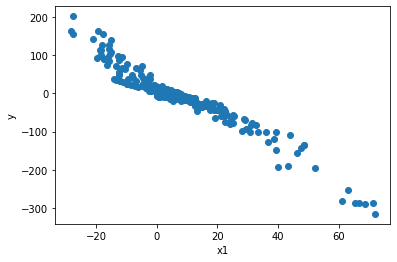

In [121]:
x1 = (np.abs(data['a']) * data['b']).values
y = data['c'].values

plt.scatter(x1, y)
plt.xlabel('x1')
plt.ylabel('y')
stats.pearsonr(x1, y)
#strong negative linear relation between x1 y

# Find Coefficients

In [122]:
# Independet variables
x1 = (np.abs(data['a']) * data['b']).values
x2= data['b'].values
c=np.ones(297)

df=pd.DataFrame({'x1':x1,'x2':x2,'C':c})
X=df.values

beta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T), y)
beta

array([-4.16300769,  1.34333755, 17.63397307])

# Test residual of C =  -4.16 * abs(A) * B +1.34 * B + 17.63

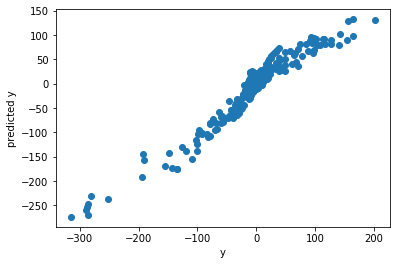

In [125]:

yp=np.dot(X,beta)
plt.xlabel('y')
plt.ylabel('predicted y')
plt.scatter(y,yp)

(array([ 4., 21., 40., 85., 70., 46., 20.,  7.,  0.,  4.]),
 array([-50.35386451, -38.09687578, -25.83988705, -13.58289832,
         -1.32590958,  10.93107915,  23.18806788,  35.44505661,
         47.70204534,  59.95903408,  72.21602281]),
 <a list of 10 Patch objects>)

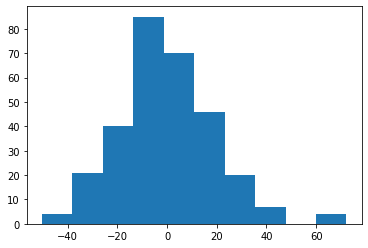

In [124]:
res = y - yp
plt.hist(res)